## Understanding the problem

We have a time dynamical system whose state is described by two variables, $x$ and $v$.

The question asks how we can approximate these time dynamical systems using a regression tree when the data is in the form
$$
((x_k, v_k), (x_{k+1}, v_{k+1}))
$$

We could use a single tree to make predictions for the next state, but we would get more accurate results if we used multiple regression trees each with a limited height?

## Code for task 4

In [1]:
from task1 import *

# generating data
T = np.arange(0, 20)

# initial state
x_k = np.array([0.5, 1.5])

# creating an array of data
# shape: (number of time steps (rows), number of entries in each row, dimension of each column (previous state and next state))
X = np.zeros((T.size, 2, 2))

for t in T:
    X[t, 0, :] = x_k
    # creating next state
    X[t, 1, 0] = 0.9*x_k[0] - 0.2*x_k[1]
    X[t, 1, 1] = 0.2*x_k[0] + 0.9*x_k[1]
    x_k = X[t, 1, :]

y = X[:, 1]
X = X[:, 0]
X.shape

(20, 2)

In [2]:
print(y[0:2])
np.mean(y[0:2], axis=0)

[[ 0.15   1.45 ]
 [-0.155  1.335]]


array([-0.0025,  1.3925])

In [3]:
model = RegressionTree()
model.fit(X[:, 0], y[:, 0])
model.decision_path(X[10])
print(y[10])

x[0] < -0.31973391403185003
x[0] < -0.5636064712650002
x[0] >= -0.6714284655500002
x == -0.7343850000000003
[-0.56360647 -0.31734186]


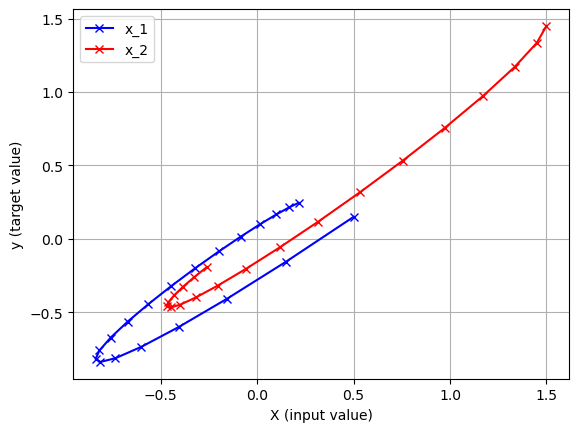

In [4]:
# plotting the correct outputs
import matplotlib.pyplot as plt

plt.plot(X[:, 0], y[:, 0], '-xb')
plt.plot(X[:, 1], y[:, 1], '-xr')
plt.xlabel('X (input value)')
plt.ylabel('y (target value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

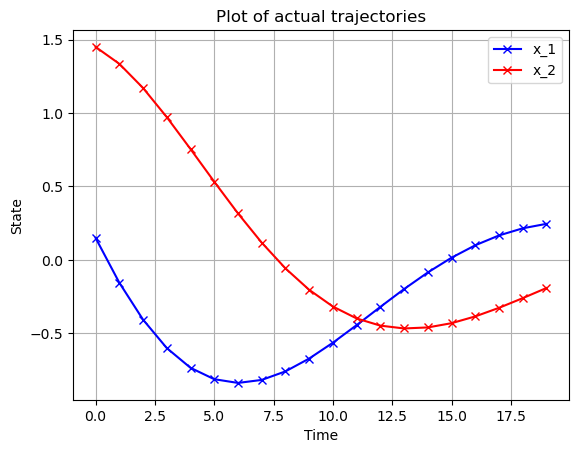

In [5]:
# trajectory of each variable vs. time
plt.plot(T, y[:, 0], '-xb', label="x_1")
plt.plot(T, y[:, 1], '-xr', label="x_2")
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Plot of actual trajectories')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

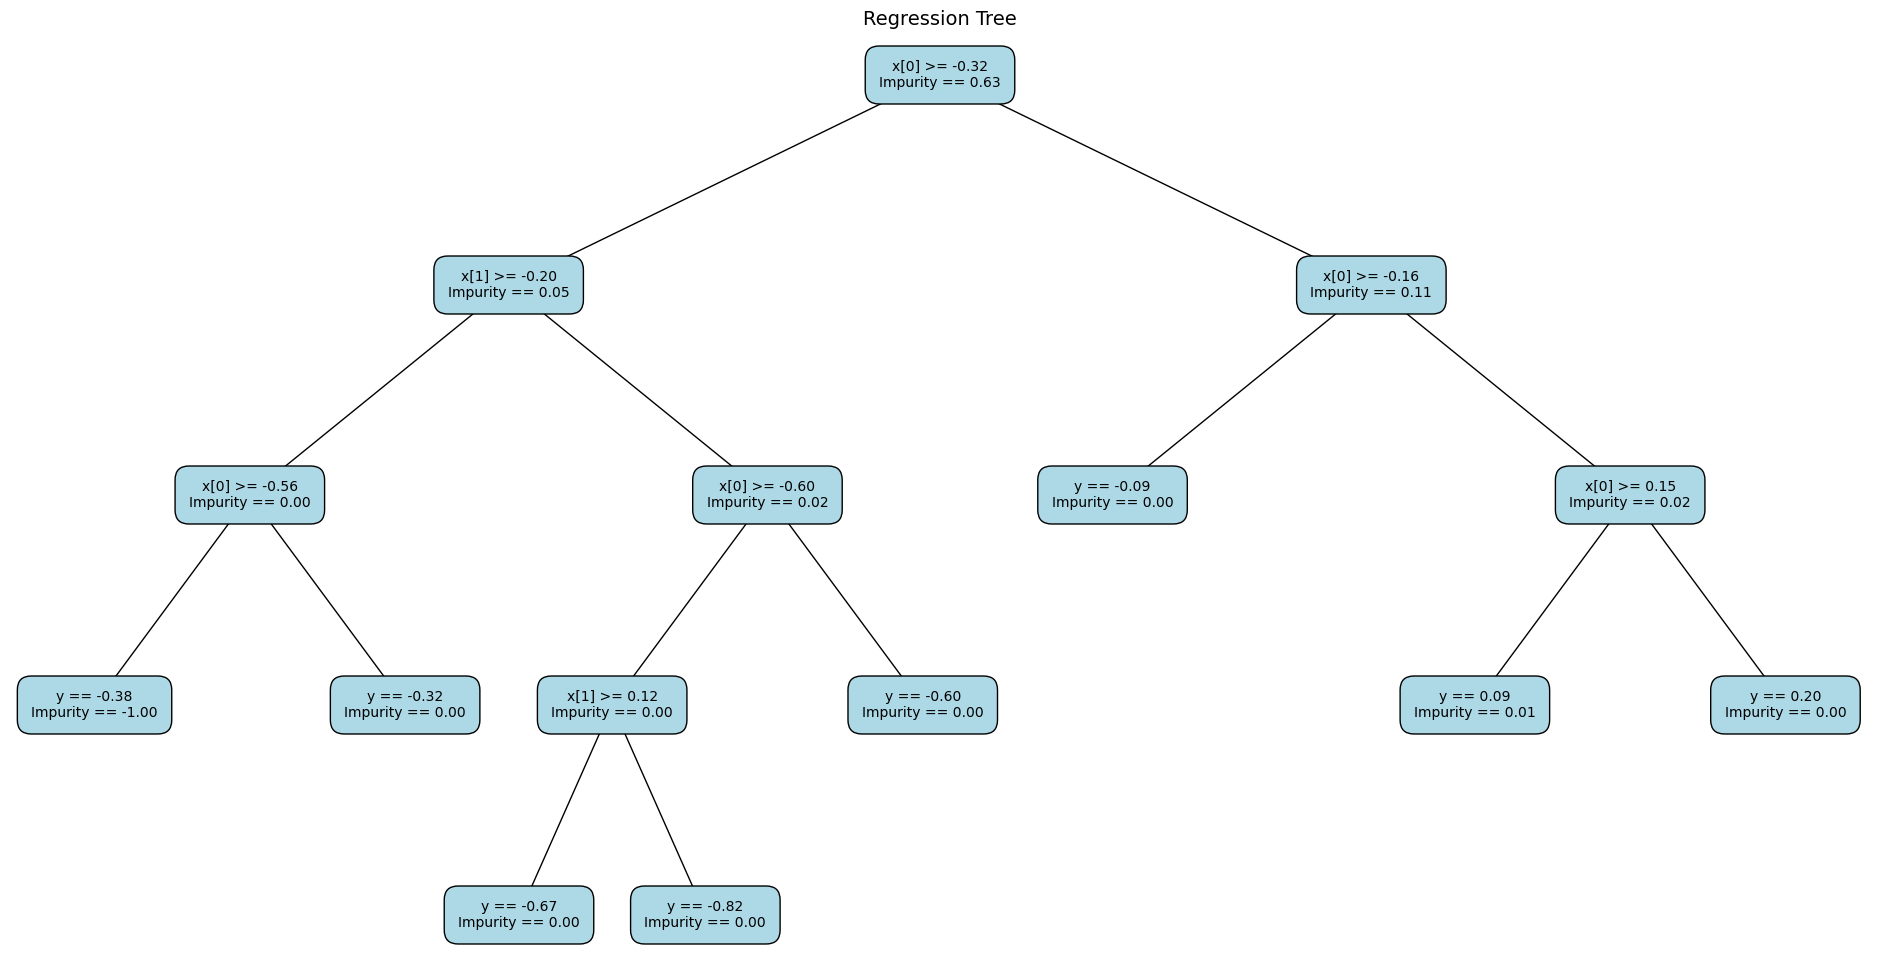

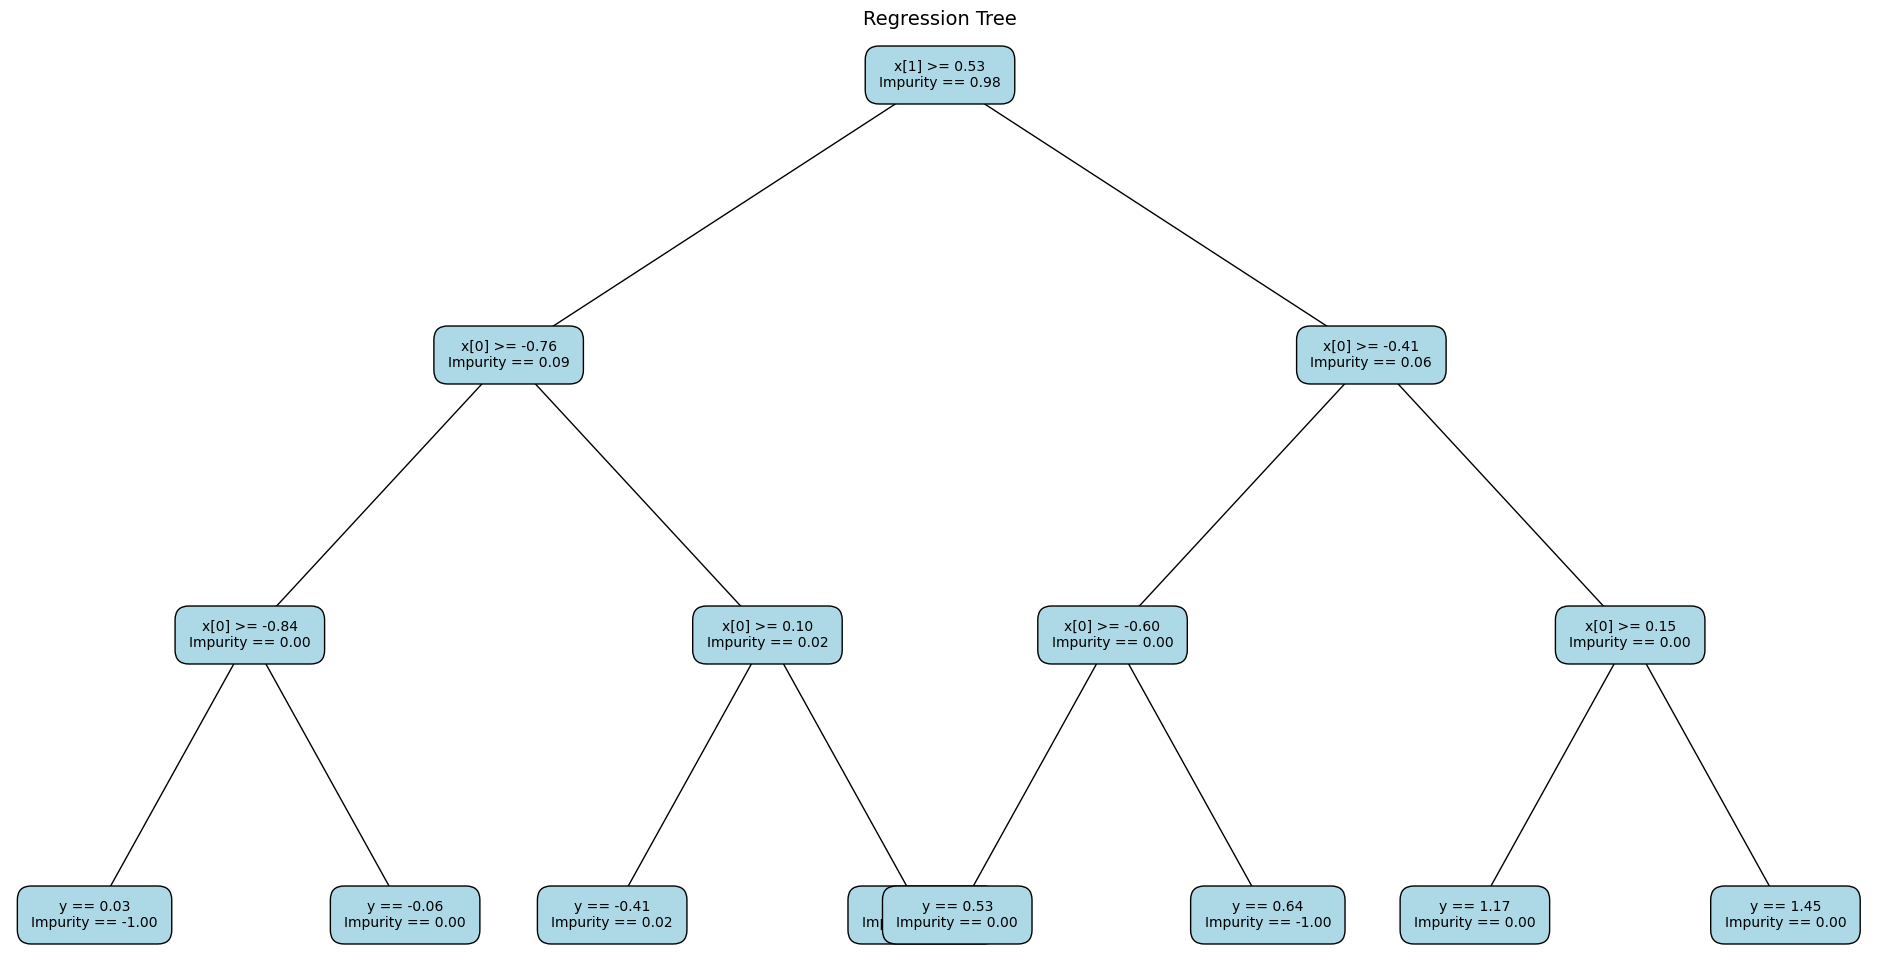

In [6]:
# training two different models for each dimension
model1 = RegressionTree(leaf_size=8)
model1.fit(X, y[:, 0])
model1.bst.plot_tree()

model2 = RegressionTree(max_height=3)
model2.fit(X, y[:, 1])
model2.bst.plot_tree()

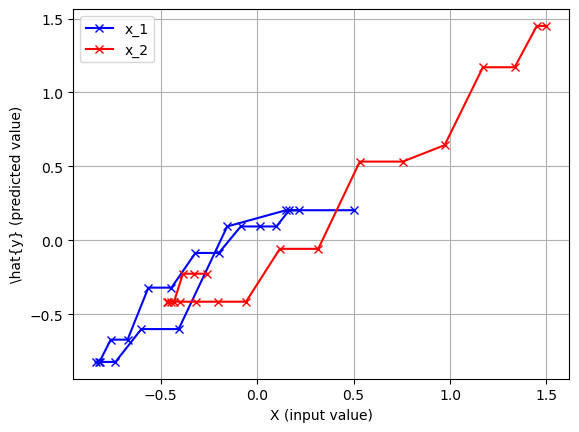

In [7]:
# plotting predictions vs. target values
predictions_x1 = []
predictions_x2 = []

for x in X:
    predictions_x1.append(model1.predict(x))
    predictions_x2.append(model2.predict(x))

plt.plot(X[:, 0], predictions_x1, '-xb')
plt.plot(X[:, 1], predictions_x2, '-xr')
plt.xlabel('X (input value)')
plt.ylabel('\\hat{y} (predicted value)')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

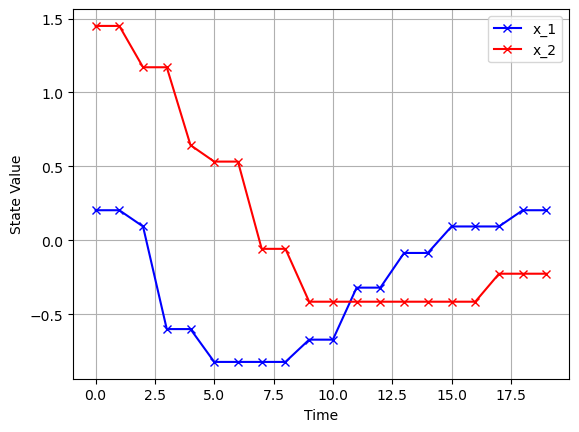

In [8]:
# plots vs. time
plt.plot(T, predictions_x1, '-xb')
plt.plot(T, predictions_x2, '-xr')
plt.xlabel('Time')
plt.ylabel('State Value')
plt.legend(['x_1', 'x_2'])
plt.grid(True)
plt.show()

## Full code for task 4 (part 1)

(0.017414853720043828, 0.015529566565322917)


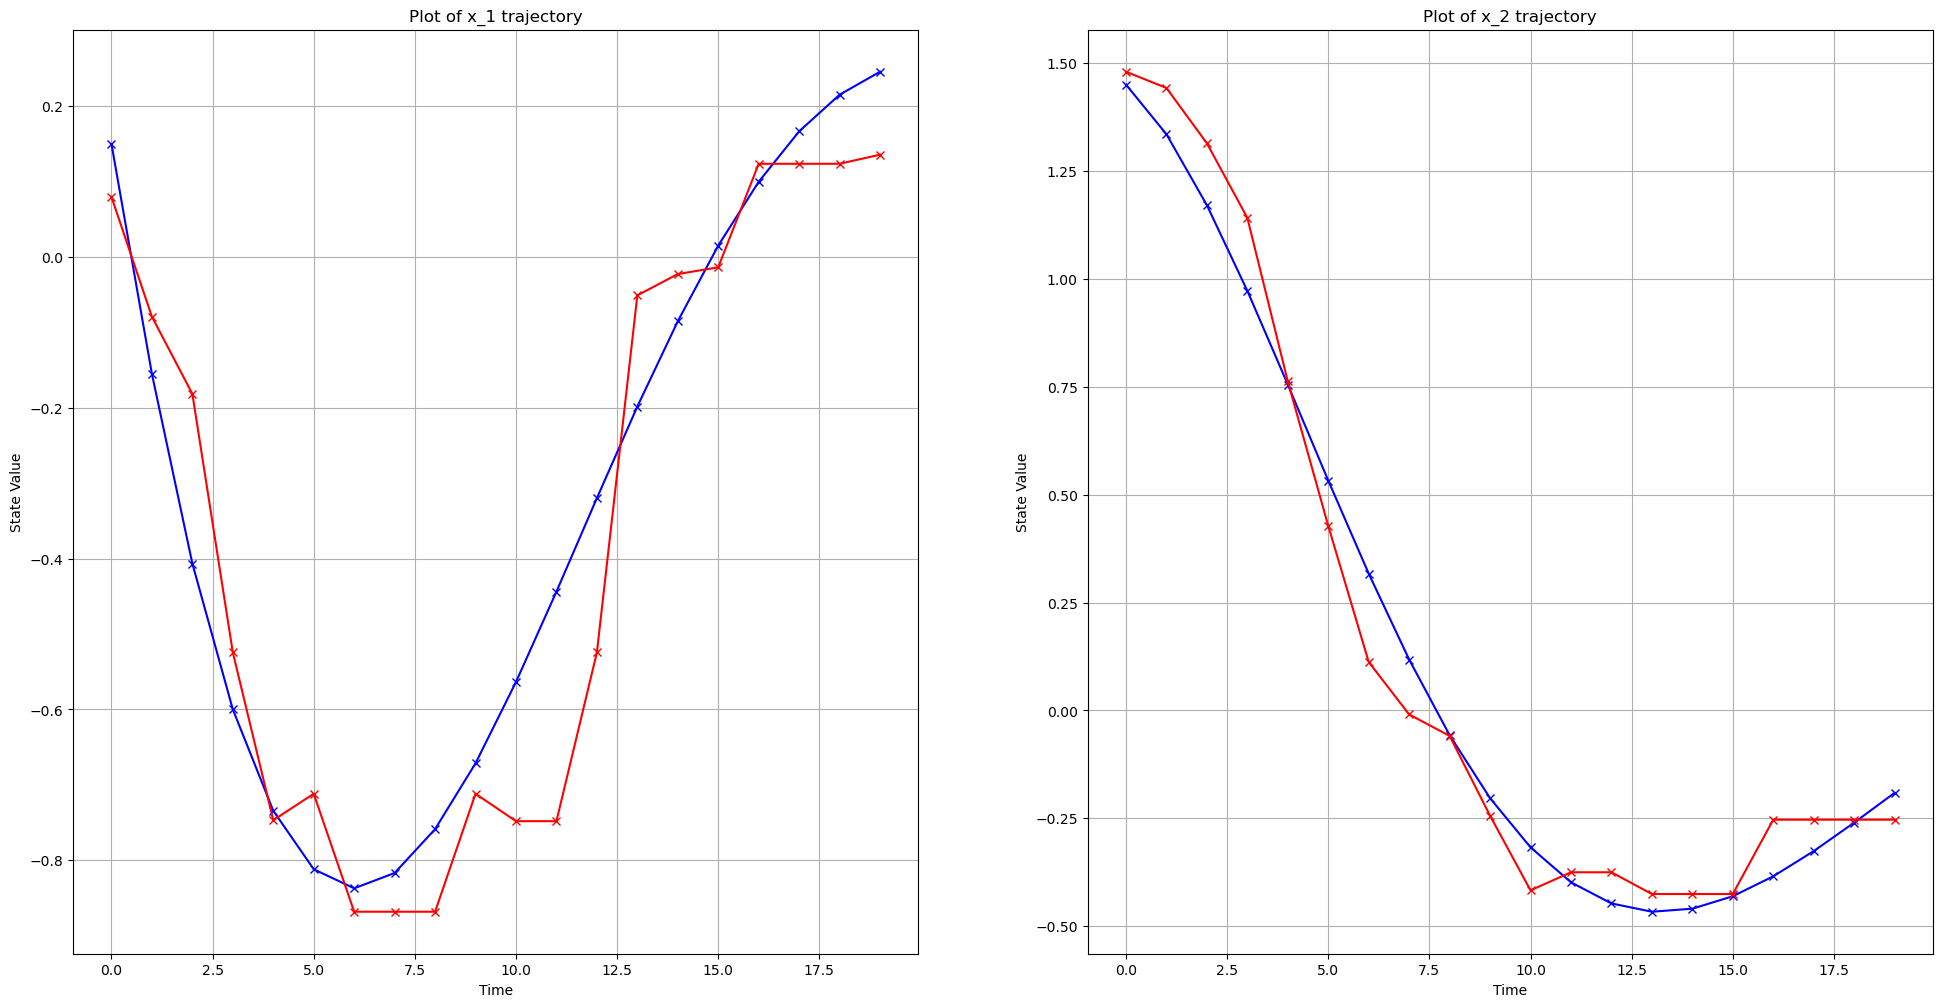

Leaf Sizes
Leaf Size    MSE                    Time Cost                
1.0          6.955420609254454      0.0004930496215820312    
2.0          2.0253728363319787     0.19589495658874512      
4.0          0.7125759465432433     0.35294675827026367      
6.0          0.5592132305644527     0.4974191188812256       
8.0          0.4200530367374232     0.5395376682281494       
10.0         0.3628110723339912     0.5103757381439209       
12.0         0.2987959873236971     0.5780467987060547       
14.0         0.24164784647799986    0.6123054027557373       
Leaf Size    MSE                    Time Cost                
1.0          6.955420609254454      0.0004930496215820312    
2.0          2.0253728363319787     0.19589495658874512      
4.0          0.7125759465432433     0.35294675827026367      
6.0          0.5592132305644527     0.4974191188812256       
8.0          0.4200530367374232     0.5395376682281494       
10.0         0.3628110723339912     0.5103757381439209     

In [17]:
import matplotlib.pyplot as plt
from task1 import *
from sklearn.model_selection import train_test_split
import time


def print_table(data, headers=None, padding=2):
    """
    Prints data as a formatted table.

    Args:
        data (list of lists): The data to be printed. Each inner list represents a row.
        headers (list, optional): A list of headers for the table. Defaults to None.
        padding (int, optional): The amount of padding to add around each cell. Defaults to 2.
    """

    # If headers are provided, add them to the data
    if headers:
        data_to_print = np.row_stack((headers, data))
    else:
        data_to_print = data

    # Calculate column widths
    col_widths = [0] * len(data_to_print[0])
    for row in data_to_print:
        for i, cell in enumerate(row):
            col_widths[i] = max(col_widths[i], len(str(cell)))

    # Add padding to column widths
    col_widths = [width + 2 * padding for width in col_widths]

    # Print the table
    for row in data_to_print:
        formatted_row = ""
        for i, cell in enumerate(row):
            formatted_row += str(cell).ljust(col_widths[i])
        print(formatted_row)

def next_state(x_1, x_2):
    y1 = 0.9*x_1 - 0.2*x_2
    y2 = 0.2*x_1 + 0.9*x_2
    return np.column_stack((y1, y2))


def make_predictions(model1, model2, X):
    predictions_x1 = []
    predictions_x2 = []

    for x in X:
        predictions_x1.append(model1.predict(x))
        predictions_x2.append(model2.predict(x))

    return (predictions_x1, predictions_x2)

def compute_mse(y, x1_predictions, x2_predictions):
    y_hat = np.array([])
    y_hat = np.column_stack((x1_predictions, x2_predictions))
    x1_error = np.mean(np.square(y[:, 0] - y_hat[:, 0]))
    x2_error = np.mean(np.square(y[:, 1] - y_hat[:, 1]))
    return (x1_error, x2_error)

### Creating trajectory evaluation
def trajectory_eval(model1, model2):
    # Time steps
    T = np.arange(0, 20)

    # initial state
    x_k = np.array([0.5, 1.5])

    # creating an array of data
    # shape: (number of time steps (rows), number of entries in each row, dimension of each column (previous state and next state))
    X = np.zeros((T.size, 2, 2))

    for t in T:
        X[t, 0, :] = x_k
        # creating next state
        X[t, 1, :] = next_state(x_k[0], x_k[1])
        x_k = X[t, 1, :]

    y = X[:, 1]
    X = X[:, 0]
    
    predictions_x1, predictions_x2 = make_predictions(model1, model2, X)

    fig, axes = plt.subplots(1, 2, figsize=(24, 12))  # Adjust figsize as needed
    axes[0].plot(T, y[:, 0], '-xb', label="actual")
    axes[0].plot(T, predictions_x1[:], '-xr', label="predicted")
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('State Value')
    axes[0].set_title('Plot of x_1 trajectory')
    axes[0].grid(True)
    
    axes[1].plot(T, y[:, 1], '-xb', label="actual")
    axes[1].plot(T, predictions_x2[:], '-xr', label="predicted")
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('State Value')
    axes[1].set_title('Plot of x_2 trajectory')
    axes[1].grid(True)
    # plt.savefig(fname="task4a_x1_trajectory", dpi=300)
    plt.show()


def create_dataset(num_of_samples):
    # creating a dataset
    X = np.random.default_rng(1).uniform(low=-5, high=5,  size=(num_of_samples, 2))
    y = next_state(X[:, 0], X[:, 1])
    return (X, y)

#### Creating a training and testing dataset
X, y = create_dataset(2_000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Training models
# training two different models for each dimension and without hyperparameters
model1 = RegressionTree()
model1.fit(X_train, y_train[:, 0])
# model1.bst.plot_tree()

model2 = RegressionTree()
model2.fit(X_train, y_train[:, 1])
# model2.bst.plot_tree()

# printing testing error
model1_predictions = []
model2_predictions = []

for x in X_test:
    model1_predictions.append(model1.predict(x))
    model2_predictions.append(model2.predict(x))
print(compute_mse(y_test, model1_predictions, model2_predictions))

#### Evaluating trajectory quality
trajectory_eval(model1, model2)

#### Finding optimal parameters
model1_mses = []
model2_mses = []
model1_training_time = []
model2_training_time = []
leaf_sizes = [1, 2, 4, 6, 8, 10, 12, 14]

print('Leaf Sizes')
# training multiple different trees
for leaf_size in leaf_sizes:
    model1 = RegressionTree(leaf_size=leaf_size)
    model2 = RegressionTree(leaf_size=leaf_size)

    model1_start = time.time()
    model1.fit(X, y[:, 0])
    model1_end = time.time()
    model1_training_time.append(model1_end - model1_start)

    model2_start = time.time()
    model2.fit(X, y[:, 1])
    model2_end = time.time()
    model2_training_time.append(model2_end - model2_start)

    model1_predictions, model2_predictions = make_predictions(
        model1, model2, X)

    model1_mse, model2_mse = compute_mse(
        y, model1_predictions, model2_predictions)
    model1_mses.append(model1_mse)
    model2_mses.append(model2_mse)

headers = ["Leaf Size", "MSE", "Time Cost"]
x1_data = np.array([leaf_sizes, model1_mses, model1_training_time]).T
x2_data = np.array([leaf_sizes, model1_mses, model1_training_time]).T
print_table(x1_data, headers, padding=2)
print_table(x2_data, headers, padding=2)

model1_mses = []
model2_mses = []
model1_training_time = []
model2_training_time = []
max_heights = [1, 2, 3, 4, 5, 6, 7, 8]

print('Max Height')
# training multiple different trees
for max_height in max_heights:
    model1 = RegressionTree(max_height=max_height)
    model2 = RegressionTree(max_height=max_height)

    model1_start = time.time()
    model1.fit(X, y[:, 0])
    model1_end = time.time()
    model1_training_time.append(model1_end - model1_start)

    model2_start = time.time()
    model2.fit(X, y[:, 1])
    model2_end = time.time()
    model2_training_time.append(model2_end - model2_start)

    model1_predictions, model2_predictions = make_predictions(
        model1, model2, X)

    model1_mse, model2_mse = compute_mse(
        y, model1_predictions, model2_predictions)
    model1_mses.append(model1_mse)
    model2_mses.append(model2_mse)

headers = ["Max Height", "MSE", "Time Cost"]
x1_data = np.array([leaf_sizes, model1_mses, model1_training_time]).T
x2_data = np.array([leaf_sizes, model1_mses, model1_training_time]).T
print_table(x1_data, headers, padding=2)
print_table(x2_data, headers, padding=2)

## Full code for task 4 (part 2)

In [2]:
def func(x, iters):
    """
    This function is pretty interesting. Since the state of the program
    is defined as the value of its variables (x and z in this case),
    we can say that the next state of the program only depends on x.
    That is, both x_{k+1} and z_{k+1} depend on x_k.
    """
    z = 0
    for _ in range(iters):
        if x > 1:
            x = 0
        else:
            x += 0.2
        z = z + x
        print(f'{x},  {z}')

func(2, 30)

0,  0
0.2,  0.2
0.4,  0.6000000000000001
0.6000000000000001,  1.2000000000000002
0.8,  2.0
1.0,  3.0
1.2,  4.2
0,  4.2
0.2,  4.4
0.4,  4.800000000000001
0.6000000000000001,  5.4
0.8,  6.2
1.0,  7.2
1.2,  8.4
0,  8.4
0.2,  8.6
0.4,  9.0
0.6000000000000001,  9.6
0.8,  10.4
1.0,  11.4
1.2,  12.6
0,  12.6
0.2,  12.799999999999999
0.4,  13.2
0.6000000000000001,  13.799999999999999
0.8,  14.6
1.0,  15.6
1.2,  16.8
0,  16.8
0.2,  17.0
